#### This notebook gives the mstm-wrapper results for 1 sphere, in order to compare to mie.py for debugging

In [1]:
import mstm
import matplotlib
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate
from mpl_toolkits.mplot3d import Axes3D

### First, let's calculate scattered intensity as a function of theta, for a fixed phi = 0, and compare to azimuthal average
The target has 1 sphere of radius 0.125 um, and the incident is parallel polarized. The incident has $\lambda = 0.4$ $\mu$m.

<IPython.core.display.Javascript object>


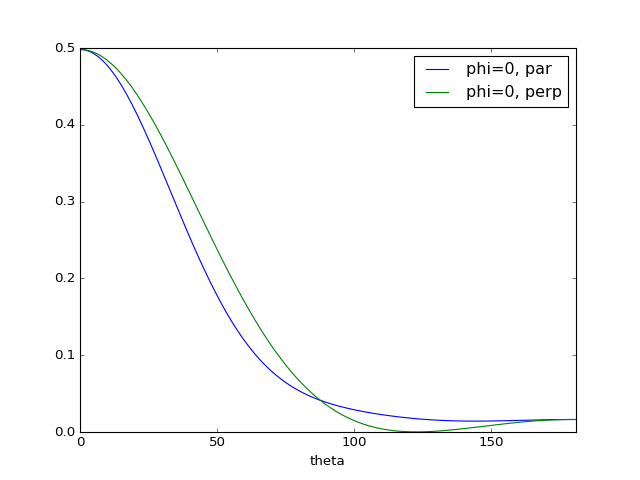

<IPython.core.display.Javascript object>


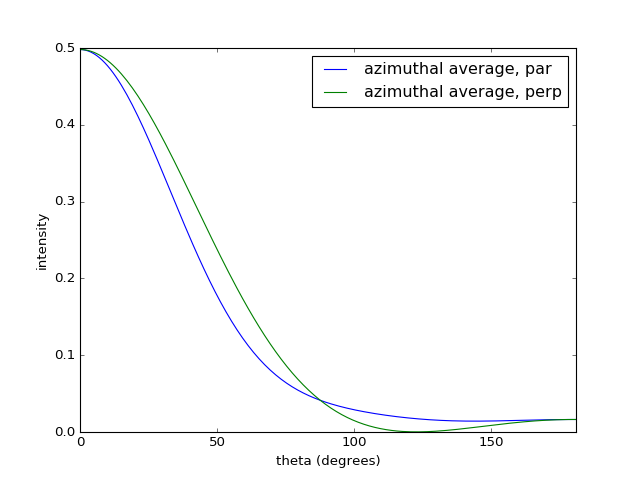

,qext,qabs,qsca
unpolarized,2.0238,0,2.0238
par,2.0238,0,2.0238
perp,2.0238,0,2.0238


In [2]:
# make target object
xpos = np.array([0])
ypos = np.array([0])
zpos = np.array([0])
radii = np.array([0.125])
n_matrix = 1.0
n_spheres = 1.54
target = mstm.Target(xpos, ypos, zpos, radii, n_matrix, n_spheres)

theta = np.linspace(0, 181, 181)
phi = np.array([0])
stokes_par = np.array([1, 1, 0, 0])
stokes_perp = np.array([1, -1, 0, 0])
wavelength = 0.4

# run MSTM and calculate the intensities
calculation = mstm.MSTMCalculation(target, wavelength, theta, phi)
result = calculation.run()
intensity_par = result.calc_intensity(stokes_par)
intensity_perp = result.calc_intensity(stokes_perp)
result.efficiencies[0]

# plot intensity versus theta
ax = intensity_par[0].plot(x='theta',y='intensity', label='phi=0, par')
intensity_perp[0].plot(x='theta', y='intensity', ax=ax, label='phi=0, perp')

# calculate azimuthal average intensity and plot
calculation = mstm.MSTMCalculation(target, wavelength, theta, phi=None)
result = calculation.run()
intensity_par = result.calc_intensity(stokes_par)
intensity_perp = result.calc_intensity(stokes_perp)

ax = intensity_par[0].plot(x='theta',y='intensity', label='azimuthal average, par')
intensity_perp[0].plot(x='theta',y='intensity', ax=ax, label='azimuthal average, perp')

plt.xlabel('theta (degrees)')
plt.ylabel('intensity')
result.efficiencies[0]


The results are in agreement with calculations from BHMIE.  However, the magnitudes are off by a constant factor.  

Note that the azimuthally averaged intensities are the same as the non-azimuthally-averaged intensities.  This is because an azimuthal average means that we rotate the scattering plane about the z-axis by an angle $\phi$ and average the scattering over $\phi$.  We do this for a particular Stokes vector that indicates the polarization.  However, that polarization is _relative to the scattering plane_ (see Bohren and Huffman p. 113).  Thus, for a sphere, the azimuthal average is the same as the non-azimuthal average, because the polarization direction rotates as the scattering plane. And that is what we see here.

### Next, let's calculate the scattered intensity as a function of theta and phi
The target has 1 sphere of radius 0.125 um, and the incident is parallel polarized. The incident has $\lambda = 0.4$ $\mu$m.

<IPython.core.display.Javascript object>


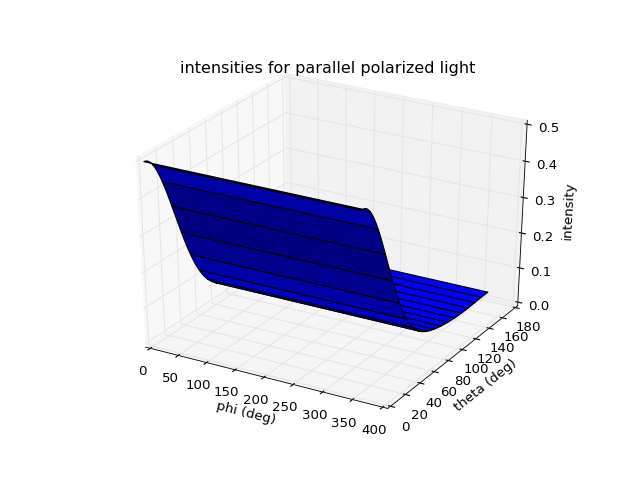

In [3]:
theta = np.linspace(0, 180, 181)
phi = np.linspace(0, 360, 10)
stokes_vec = np.array([1, 1, 0, 0])

# calculate the intensities
calculation = mstm.MSTMCalculation(target, wavelength, theta, phi)
result = calculation.run()
intensity = result.calc_intensity(stokes_vec)

# reshape the result to be a 2d array
table = intensity[0].pivot_table('intensity', 'theta', 'phi')

plt.figure()
ax = plt.axes(projection = '3d')
p,t=np.meshgrid(phi,theta)
ax.plot_surface(p,t,table.as_matrix())
ax.set_zlabel('intensity')
plt.xlabel('phi (deg)')
plt.ylabel('theta (deg)')
plt.title('intensities for parallel polarized light')

### Now we calculate the intensity as a function of theta and phi, but for perpendicularly polarized incident light
The target has 1 sphere of radius 0.125 um, and the incident is perpendicularly polarized. The incident has $\lambda = 0.4$ $\mu$m.

<IPython.core.display.Javascript object>


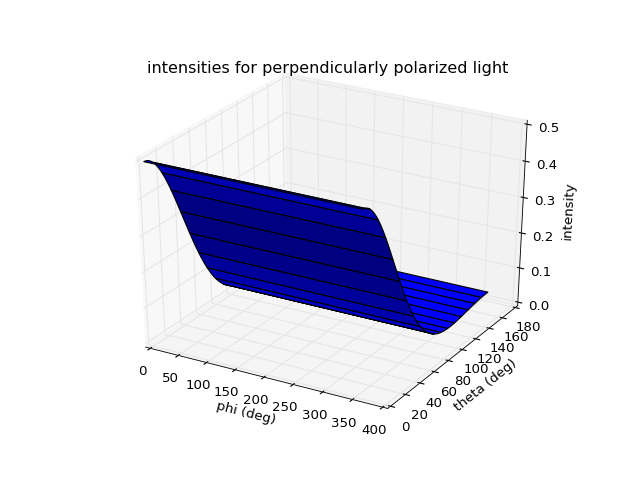

In [4]:
theta = np.linspace(0, 180, 181)
phi = np.linspace(0, 360, 10)
stokes_vec = np.array([1, -1, 0, 0])

# calculate the intensities
calculation = mstm.MSTMCalculation(target, wavelength, theta, phi)
result = calculation.run()
intensity = result.calc_intensity(stokes_vec)

# reshape the result to be a 2d array
table = intensity[0].pivot_table('intensity', 'theta', 'phi')

plt.figure()
ax = plt.axes(projection = '3d')
p,t=np.meshgrid(phi,theta)
ax.plot_surface(p,t,table.as_matrix())
ax.set_zlabel('intensity')
plt.xlabel('phi (deg)')
plt.ylabel('theta (deg)')
plt.title('intensities for perpendicularly polarized light')

Again, there is no $\phi$ dependence because the Stokes vector is defined with respect to the scattering plane.  Therefore the direction of polarization rotates as $\phi$ changes.  If we choose a Stokes vector of $\left[1, -1, 0, 0\right]$, indicating vertically polarized light, the polarization direction is always perpendicular to the scattering plane.

### Now let's look at the integrated Intensities as a function of wavelength

C:\Users\vnm\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
C:\Users\vnm\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


<IPython.core.display.Javascript object>


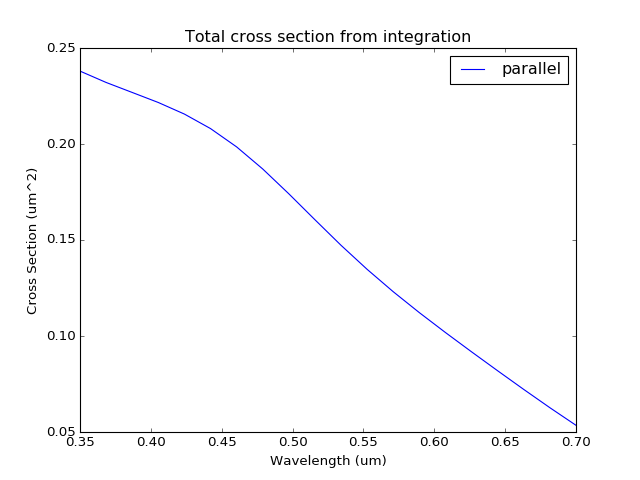

<IPython.core.display.Javascript object>


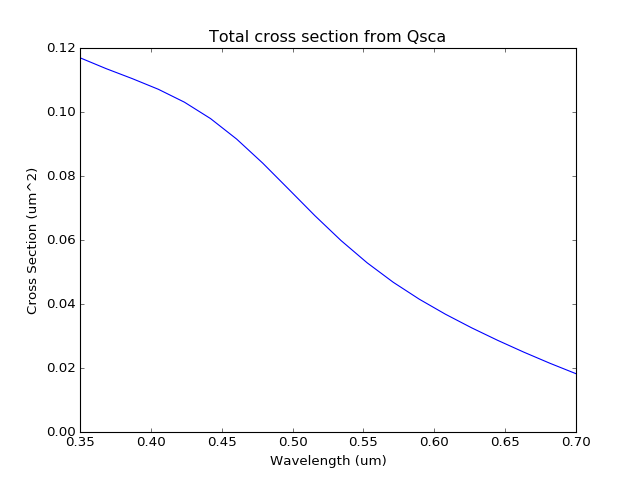

In [11]:
wavelength = 0.35, 0.7, 20
theta = np.linspace(0, 180, 181)

# calculate the cross section for horizontal polarization
calculation = mstm.MSTMCalculation(target, wavelength, theta, phi=None)
result = calculation.run()
total_csca_perp = result.calc_cross_section(np.array([1, 1, 0, 0]), 0., 180.)

# calculate the cross section for horizontal polarization
total_csca_par = result.calc_cross_section(np.array([1, -1, 0, 0]), 0., 180.)

plt.figure()
plt.plot(result.wavelength, total_csca_par)
#plt.plot(result.wavelength, total_csca_perp)
#plt.plot(result.wavelength, (total_csca_par+total_csca_perp)/2)
plt.legend(['parallel','perpendicular','averaged'])
plt.xlabel('Wavelength (um)')
plt.xlim([0.35,0.7])
plt.ylabel('Cross Section (um^2)')
plt.title('Total cross section from integration')

# calculate the total cross section using the scattering efficiency
qsca = np.array([result.efficiencies[i].loc['par','qsca'] for i in range(len(result.efficiencies))])
csca = qsca*np.pi*radii[0]**2
plt.figure()
plt.plot(result.wavelength, csca)
plt.xlabel('Wavelength (um)')
plt.xlim([0.35,0.7])
plt.ylabel('Cross Section (um^2)')
plt.title('Total cross section from Qsca')

The bottom curve is based on the Qsca directly reported by MSTM. It agrees with BHMIE.  However, the top curve, which is based on integration, doesn't quite match the bottom one in shape or curvature, especially at long wavelengths.  Let's check that S11 is normalized as expected by numerically integrating it:

C:\Users\vnm\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


<IPython.core.display.Javascript object>


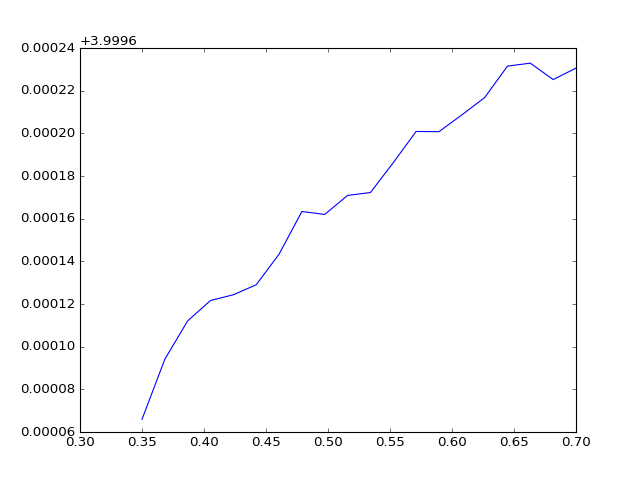

In [12]:
integral = np.zeros(result.mstm_calculation.num_wavelengths)
for i in range(result.mstm_calculation.num_wavelengths):
    integrand = (result.scattering_matrix[i]['11']*
                 np.sin(result.scattering_matrix[i]['theta']*np.pi/180.))
    f = scipy.interpolate.interp1d(result.scattering_matrix[i]['theta'].as_matrix()*np.pi/180.,
                            integrand.as_matrix())
    integral[i], err = scipy.integrate.quad(f, 0, np.pi)
plt.figure()
plt.plot(result.wavelength, integral*2)

This plot should be equal to 1 at all wavelengths if the normalization condition in the MSTM manual is correct.  It is very nearly a constant, though we're off by a factor of 4.